### Advertisiment Data - Model ###

**Step 1 - Data Loading**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#read data into dataframe

data = pd.read_csv(r"C:\Users\lenovo\Downloads\drive-download-20241117T104241Z-001\Advertising.csv",index_col=0, header=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
print(data.shape)
print(data.dtypes)
print(data.describe())

(200, 4)
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [6]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

As per the above observations we can see that there are no missing values in data. Also, we can observer that maximum investment is done in TV followed by newspaper and Radio.

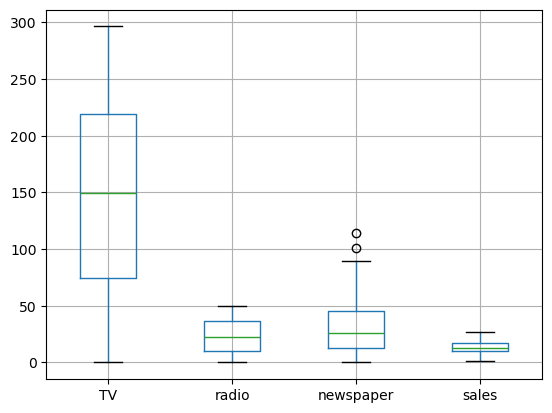

In [8]:
data.boxplot()
plt.show()

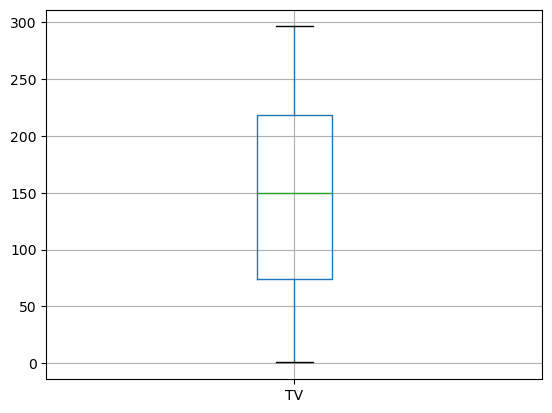

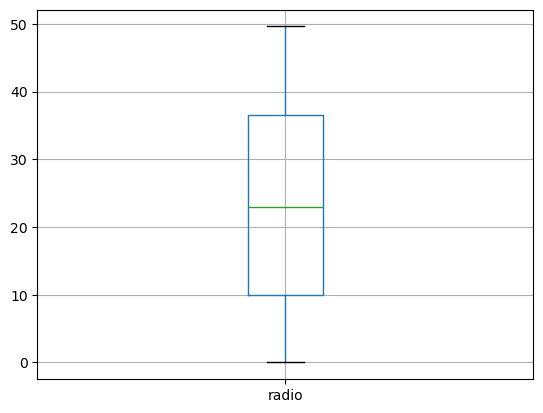

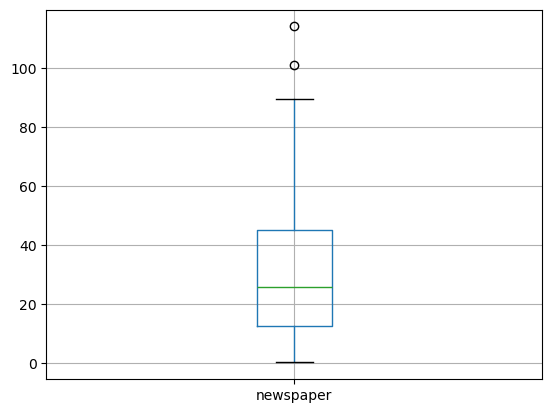

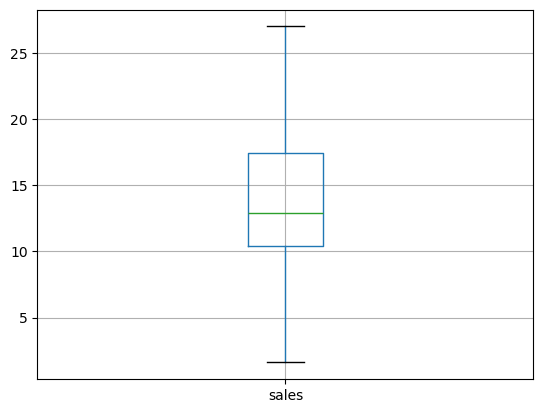

In [9]:
#Assumption 1: There should not be any outliers.
#checking using boxplot

for i in data.columns:
    data.boxplot(column = i)
    plt.show()

#data.drop(data[data["newspaper"]>=90.index, axis=0, inplace=True)

#We are not dropping the data here, as it is a real data and there are chances of investment of 90$.

In [11]:
data[data["newspaper"]>=90].index

Index([17, 102], dtype='int64')

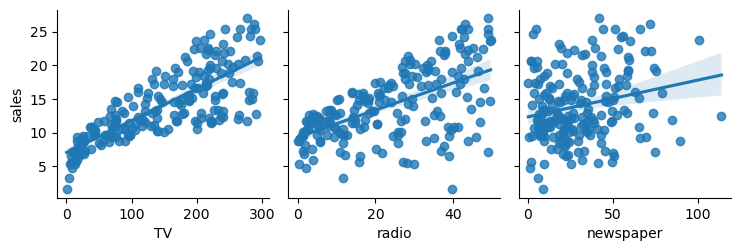

In [12]:
#Assumption 2: Assumption of linearity: Every independent variable should have a Linear relationship with the dep var. 

sns.pairplot(data, x_vars = ['TV', 'radio','newspaper'], y_vars=['sales'], kind = "reg")
plt.show()

In [13]:
#data.drop(["newspaper"], axis = 1. inplace = True)

In [14]:
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


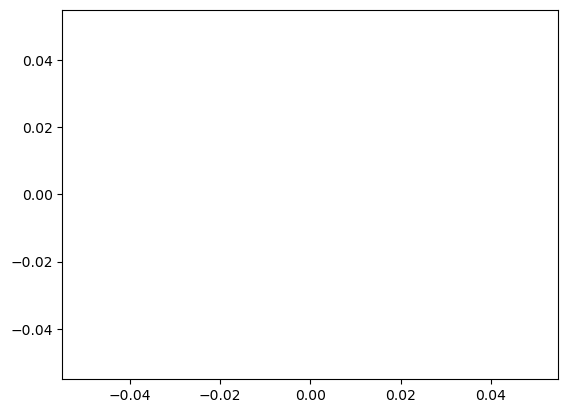

In [15]:
sns.distplot()
plt.show()

In [16]:
#create X and Y

X = data .loc[:,['TV','radio','newspaper']]
Y = data.loc[:,'sales']

In [17]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


**Correleation** - How 2 variables are in relation with each other.  
+ve corr ---> X inc Y inc  
-ve corr ---> X inc Y des  
no corr ----> X inc, no change in Y.  

The range scale of correlection ---> -1 to +1.

**Multicollinearity** - When an independent variable shows relation with another independent it is said as multicollinearity.

                 TV     radio  newspaper
TV         1.000000  0.054809   0.056648
radio      0.054809  1.000000   0.354104
newspaper  0.056648  0.354104   1.000000


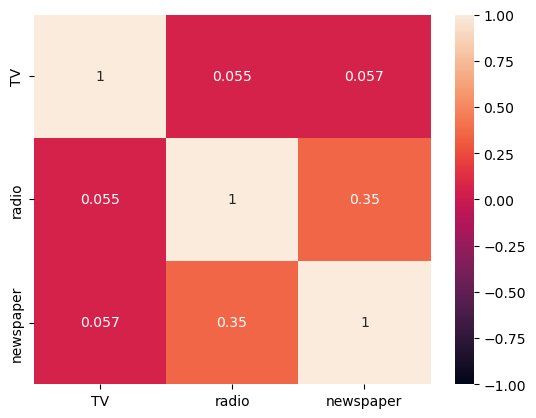

In [20]:
#Assumption of No multicollinearity: There should not be multicollinearity between the independent variable.

corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df, vmax=1., vmin=-1.0, annot=True)   #annot is use to let graph show the values on square.
plt.show() 

The above map is heatmap. DF is correleation. Here between TV and newspaper the value is 0.057 which is close to 0. Which means there is no releation.  
Where as between TV and TV it is 1, and it's fine to have relation between TV and TV. There is no high dependency between independennt variable. 

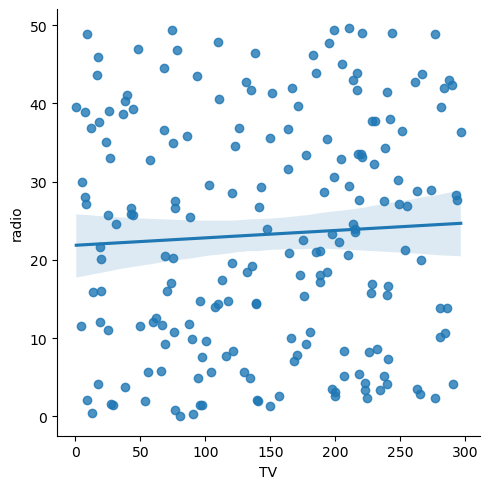

In [22]:
sns.lmplot(data=X,x="TV", y="radio")
plt.show()

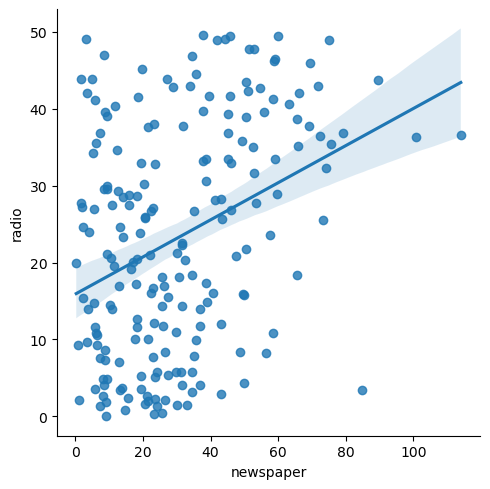

In [23]:
sns.lmplot(data=X,x="newspaper", y="radio")
plt.show()

**Here we can see the multicollinearity between newspaper and radio.**

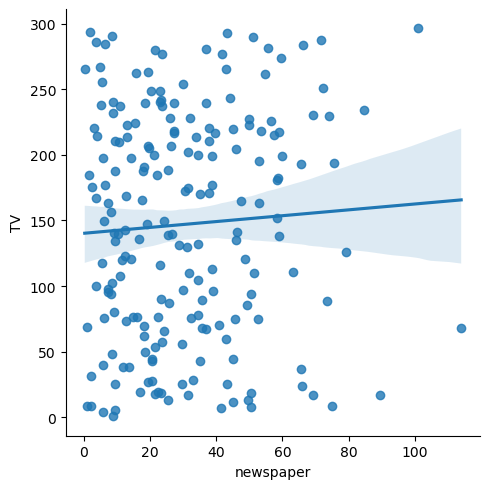

In [25]:
sns.lmplot(data=X,x="newspaper", y="TV")
plt.show()

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df=pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,2.49
1,radio,3.29
2,newspaper,3.06


In [27]:
#X.drop("newspaper", axis=1, inplace="True")
#return the VIF code  

#here since there are only 3 feature we are not eliminating but in case there were 7-8 features with high VIF  
#than above code would be useful to drop the same.

##### When we have data greater than 1000 entries data slipt will be 70-30% that is 70% training and 30% testing. ##### 

##### But if sample size is is <1000 than data split can be 80-20% that is 80% training and 20% testing. #####

In [29]:
from sklearn.model_selection import train_test_split
#Split the data into test and train

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print("Percent of train data", X_train.shape[0]/X.shape[0]*100)

(160, 3)
(40, 3)
(160,)
(40,)
Percent of train data 80.0


In [31]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()

lm.fit(X_train, Y_train)

print(lm.intercept_)
print(lm.coef_)

3.2540971144188813
[ 0.0437726   0.19343299 -0.00222879]


In [32]:
#Pair the features names with coefficient
print(list(zip(X.columns, lm.coef_)))

[('TV', 0.04377260306304603), ('radio', 0.19343298611600773), ('newspaper', -0.0022287928056053644)]


In [33]:
X1 = 0 
X2 = 100
X3=np.log1p(0)
Y_pred=3.2540971144188813+(0.043772603*X1)+(0.19343298*X2)+(-0.00222879*X3)
print(Y_pred)

22.59739511441888


In [34]:
X_test

,TV,radio,newspaper
60,210.7,29.5,9.3
6,8.7,48.9,75.0
21,218.4,27.7,53.4
199,283.6,42.0,66.2
53,216.4,41.7,39.6
20,147.3,23.9,19.1
163,188.4,18.1,25.6
56,198.9,49.4,60.0
70,216.8,43.9,27.2
3,17.2,45.9,69.3


In [35]:
#Prediction of test and training set result

Y_pred = lm.predict(X_test)
print(Y_pred)

[18.1625299  12.92663232 18.0531098  23.64464668 20.70438374 14.28227997
 14.94493548 21.38232981 21.17508238 12.73110461 24.00312134  7.21544071
 12.24762152 19.24345998 19.38241854 13.45643798 19.6247089   9.2531648
 21.13268075 20.90762408 15.53485445 10.92529369 22.82955184 15.8122438
 17.42515749  8.16218669 11.89783444 12.70337575 21.74138085  7.96215368
 12.50099965 20.45535282  4.72120047  4.72259288 16.75292333 15.75804986
  6.74415499 17.73477354  9.01591827 13.617599  ]


In [36]:
new_df = pd.DataFrame()
new_df=X_test.copy()

new_df["Actual sales"] = Y_test
new_df["Predicted sales"] = Y_pred
new_df = new_df.reset_index().drop("index", axis=1)

In [37]:
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
0,210.7,29.5,9.3,18.4,18.162530
1,8.7,48.9,75.0,7.2,12.926632
2,218.4,27.7,53.4,18.0,18.053110
3,283.6,42.0,66.2,25.5,23.644647
4,216.4,41.7,39.6,22.6,20.704384
5,147.3,23.9,19.1,14.6,14.282280
6,188.4,18.1,25.6,14.9,14.944935
7,198.9,49.4,60.0,23.7,21.382330
8,216.8,43.9,27.2,22.3,21.175082
9,17.2,45.9,69.3,9.3,12.731105


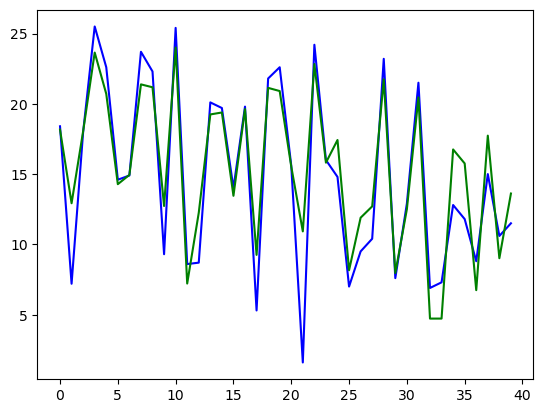

In [38]:
new_df["Actual sales"].plot(color="blue")
new_df["Predicted sales"].plot(color="green")
plt.show()

In [39]:
lm.score(X_train, Y_train)

0.9209087553499528

In [40]:
len(Y_pred)

40

In [41]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

rmse=np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE", rmse)

mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:", adjusted_r_squared)

R-squared: 0.8353672324670594
RMSE 2.58852984462781
MSE: 6.700486756528875
Adj R-square: 0.8328473431680857


In [42]:
print(Y_test.min())
print(Y_test.max())

1.6
25.5


In [45]:
new_df["Residual"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df

,TV,radio,newspaper,Actual sales,Predicted sales,Residual
0,210.7,29.5,9.3,18.4,18.162530,0.237470
1,8.7,48.9,75.0,7.2,12.926632,-5.726632
2,218.4,27.7,53.4,18.0,18.053110,-0.053110
3,283.6,42.0,66.2,25.5,23.644647,1.855353
4,216.4,41.7,39.6,22.6,20.704384,1.895616
5,147.3,23.9,19.1,14.6,14.282280,0.317720
6,188.4,18.1,25.6,14.9,14.944935,-0.044935
7,198.9,49.4,60.0,23.7,21.382330,2.317670
8,216.8,43.9,27.2,22.3,21.175082,1.124918
9,17.2,45.9,69.3,9.3,12.731105,-3.431105


#### **Model Tunning/Optimization** ####

In [83]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train, Y_train)

"""
previous values:
3.2540971144188813
[ 0.0437726   0.19343299 -0.00222879]
"""

#print intercept and coefficients

print(rid.intercept_)
print(rid.coef_)

3.254199650479162
[ 0.0437726   0.19342655 -0.00222742]


In [85]:
Y_pred = rid.predict(X_test)

In [87]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

rmse=np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE", rmse)

mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:", adjusted_r_squared)

R-squared: 0.8353686978689224
RMSE 2.5885183243060816
MSE: 6.700427115268364
Adj R-square: 0.8328488309995692


In [91]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train, Y_train)

print(las.intercept_)
print(las.coef_)

3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


In [95]:
Y_pred = las.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

rmse=np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE", rmse)

mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:", adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE 2.5831514271094234
MSE: 6.672671295377451
Adj R-square: 0.8335412372688292


In [97]:
#OSL ---> OLS(Y_train) ----> sklearn
#Y~X1+X2+X3, data=df--->statsmodels

In [101]:
new_df = pd.DataFrame()
new_df=X_train.copy()

new_df["sales"] = Y_train.copy()
new_df

,TV,radio,newspaper,sales
191,39.5,41.1,5.8,10.8
8,120.2,19.6,11.6,13.2
27,142.9,29.3,12.6,15.0
139,43.0,25.9,20.5,9.6
59,210.8,49.6,37.7,23.8
...,...,...,...,...
114,209.6,20.6,10.7,15.9
65,131.1,42.8,28.9,18.0
16,195.4,47.7,52.9,22.4
126,87.2,11.8,25.9,10.6


In [111]:
import statsmodels.formula.api as sm

#create a fitted model with all three features

lm_model =sm.ols(formula='sales ~ TV + radio + newspaper', data = new_df).fit()

#print the coefficients

print(lm_model.params)
print(lm_model.summary())

Intercept    3.254097
TV           0.043773
radio        0.193433
newspaper   -0.002229
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.5
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.09e-85
Time:                        17:28:46   Log-Likelihood:                -276.62
No. Observations:                 160   AIC:                             561.2
Df Residuals:                     156   BIC:                             573.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [113]:
Y_pred_new=lm_model.predict(X_test)

In [117]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

rmse=np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)

mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:", adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
MSE: 6.672671295377451
Adj R-square: 0.8335412372688292


In [123]:
import statsmodels.formula.api as sm

lm_model = sm.ols(formula = 'sales ~ TV + radio', data=new_df).fit()

print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           3.47e-87
Time:                        17:47:45   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [125]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

rmse=np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE:", rmse)

mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:", adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
MSE: 6.672671295377451
Adj R-square: 0.8335412372688292


**Post_model Building Assumptions**

#Assumption: Errors should be random checked using Residual v/s Fitted plot.

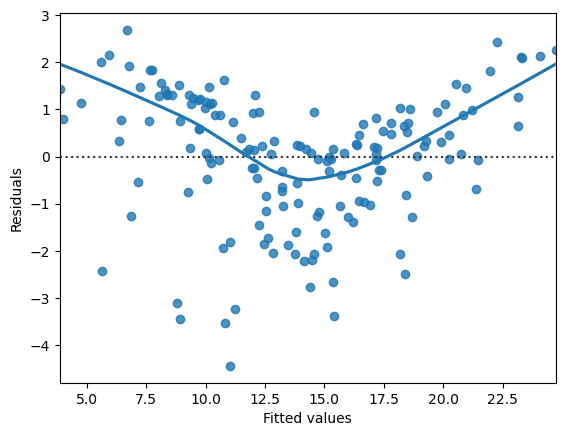

In [131]:
model_fitted_y = lm_model.fittedvalues   
sns.residplot(x=model_fitted_y, y='sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

Assumption: Errors should follow a approximate normal ditribution checked using Normal QQ plot.

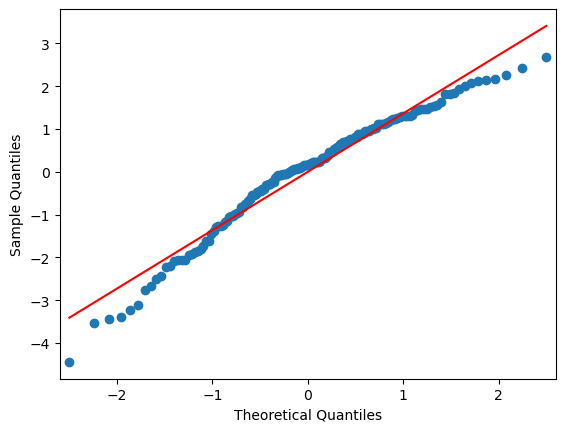

In [134]:
import statsmodels.api as sma

sma.qqplot(lm_model.resid, line='s')
plt.show()

Assumption: Errors should follow a constant variance --> **Homoskedasticity** checked using Scale location plot. There should not be a stip curved.

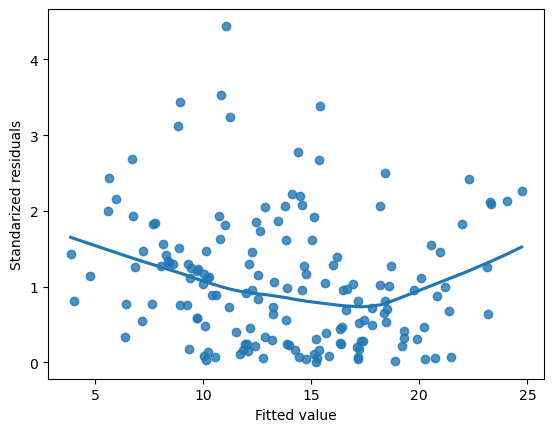

In [142]:
model_norm_residuals_abs_sqrt=(np.abs(lm_model.resid))

sns.regplot(x=lm_model.fittedvalues, y=model_norm_residuals_abs_sqrt, scatter=True, lowess=True)

plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()